# Py Learn Data Course

In [1]:
# ! pip install pyarrow
# ! pip install --upgrade pandas

In [1]:
from pathlib import Path
import json
import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
print(pd.__version__)


2.0.3


In [3]:
import requests
zip_file = 'python-panama-real-estate.zip'

file_url = f'https://raw.githubusercontent.com/pythonpanama//pylearn-data-101//master/course_data/{zip_file}'
print(file_url)
def download_file2(url):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)

    return local_filename

download_file2(file_url)

ModuleNotFoundError: No module named 'requests'

# Metas

Qué queremos?

Los datos que tenemos sirven para responder lo que queremos?

Queremos encontrar una vivienda para 4 personas y nuestro presupuesto es 500,000 +/- 10%. Dos adultos y dos menores de edad lo que implica al menos dos recamaras.

Se desea encontrar las 10 viviendas con mejor precio por metro cuadrado.




## Configuration

In [4]:
local = True
    
if local:
    data_folder = Path().cwd().parent / 'data' / 'house_pricing'

    csv_file = data_folder / 'python-panama-real-estate.csv'

    print(f'Folder {data_folder} existe: {data_folder.exists()}')
    print(f'CSv file: {csv_file.name}')
else:
    csv_file = Path('python-panama-real-estate.csv')

    print(f'CSv file: {csv_file.name}')

Folder /home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing existe: True
CSv file: python-panama-real-estate.csv


## Loading data

### Normal load

In [5]:
df = pd.read_csv(csv_file)

Notice:
- Dtypes
- Memory usage


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   status                    733159 non-null  object 
 1   price                     733088 non-null  float64
 2   bed                       617177 non-null  float64
 3   bath                      621407 non-null  float64
 4   Lot area (acres)          572378 non-null  float64
 5   Full Address              733159 non-null  object 
 6   street                    732069 non-null  object 
 7   city                      733087 non-null  object 
 8   state                     705907 non-null  object 
 9   Zip code                  732957 non-null  float64
 10  House size (square feet)  520772 non-null  float64
 11  sold_date                 347237 non-null  object 
 12  shootings_count           293781 non-null  float64
 13  bath_tub                  0 non-null       f

### Pyarrow load

Aqui solo hice el ajuste

In [7]:
df = pd.read_csv(csv_file, engine='pyarrow', dtype_backend='pyarrow')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  string[pyarrow]     
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  string[pyarrow]     
 8   state                     733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  double[pyarrow]     
 10  House size (square feet)  520772 non-null  double[pyarro

### Setting categories

Impacto en la memoria al usar categorias.

In [9]:
df['city'] = df['city'].astype('category')

# df['state'] = df['state'].astype('category')
df['Zip code'] = df['Zip code'].astype('category')
df['status'] = df['status'].astype('category')

In [10]:
df['status'].value_counts()

status
for_sale          731566
ready_to_build      1593
Name: count, dtype: int64

## Exploración de datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  category            
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  category            
 8   state                     733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  category            
 10  House size (square feet)  520772 non-null  double[pyarro

### Shape

In [12]:
print(f'Filas {df.shape[0]:,} Columnas: {df.shape[1]}')

original_row_count = df.shape[0]

Filas 733,159 Columnas: 14


### Head

In [13]:
df.head()

,status,price,bed,bath,Lot area (acres),Full Address,street,city,state,Zip code,House size (square feet),sold_date,shootings_count,bath_tub
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,,601.0,920.0,<NA>,<NA>,<NA>
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,,601.0,1527.0,<NA>,<NA>,<NA>
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,,795.0,748.0,<NA>,<NA>,<NA>
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,,731.0,1800.0,<NA>,<NA>,<NA>
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,,680.0,<NA>,<NA>,<NA>,<NA>


### Describe

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
df.describe()

,price,bed,bath,Lot area (acres),House size (square feet),sold_date,shootings_count
count,733088.00,617177.00,621407.00,572378.00,520772.00,347237,293781.00
mean,725701.66,3.42,2.54,19.06,2192.53,2008-11-08,4.79
min,0.00,1.00,1.00,0.00,100.00,1901-01-01,1.00
25%,237500.00,2.00,2.00,0.14,1195.00,2002-08-26,1.00
50%,419000.00,3.00,2.00,0.35,1714.00,2009-07-22,3.00
75%,725000.00,4.00,3.00,1.38,2547.25,2017-10-12,7.00
max,875000000.00,123.00,198.00,100000.00,1450112.00,2023-03-01,36.00
std,1768768.91,2.03,2.00,1022.01,3141.46,NaN,5.37


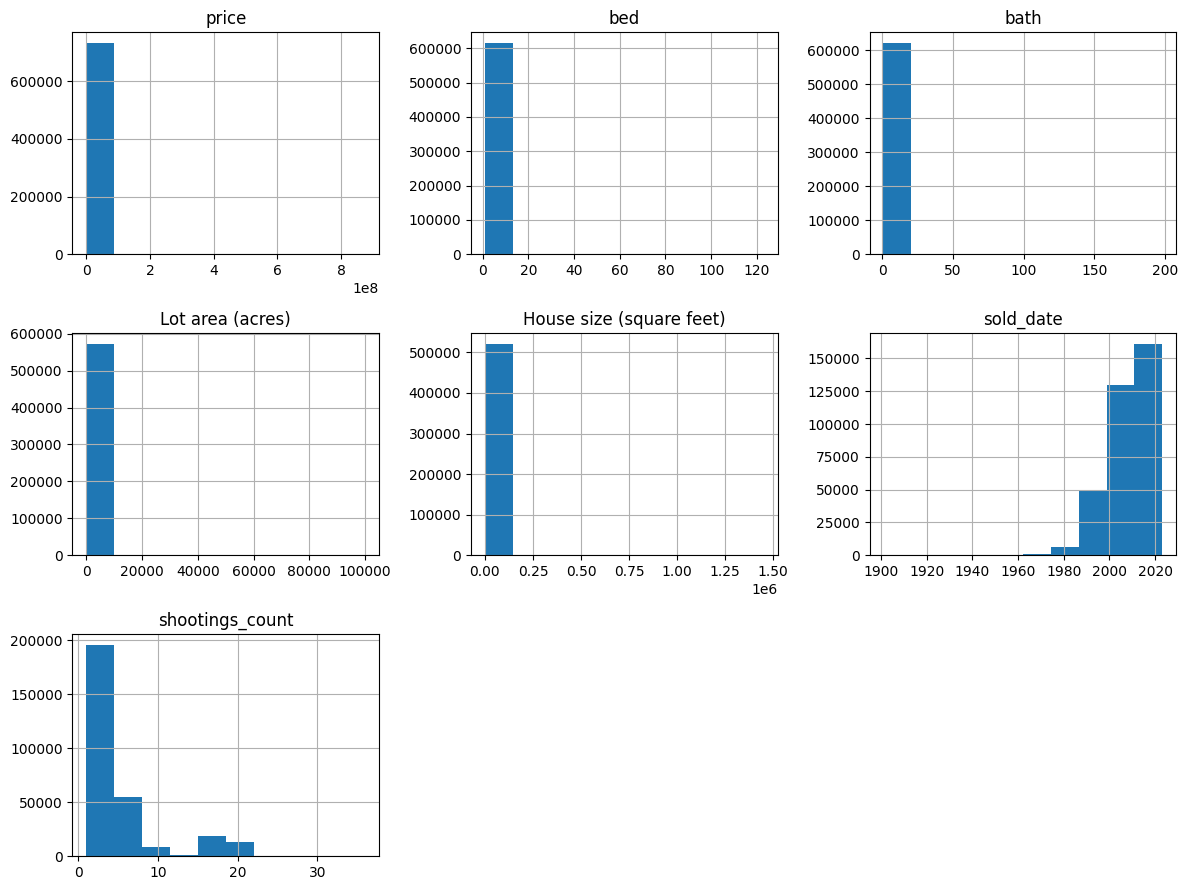

In [16]:
df.hist(figsize=(12, 9))
plt.tight_layout()
plt.show()

### Histogramas

<Axes: >

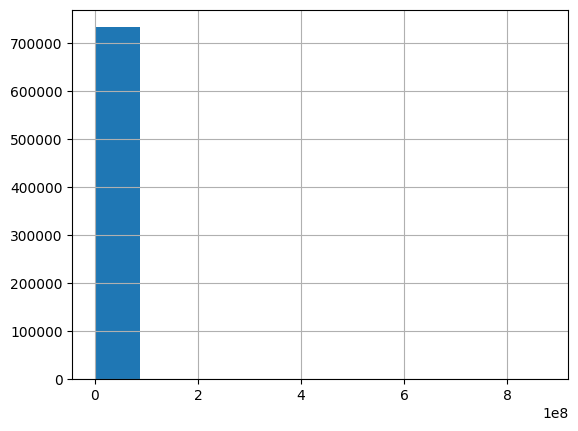

In [17]:
df['price'].hist(bins=10)

<Axes: >

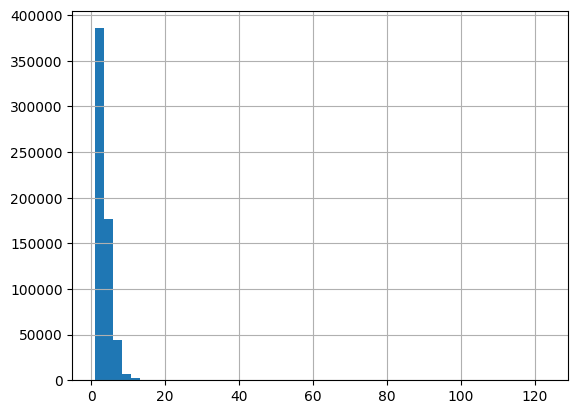

In [18]:
df['bed'].hist(bins=50)

### Valores Nulos

In [19]:
df.isna().sum()

status                           0
price                           71
bed                         115982
bath                        111752
Lot area (acres)            160781
Full Address                     0
street                           0
city                             0
state                            0
Zip code                       202
House size (square feet)    212387
sold_date                   385922
shootings_count             439378
bath_tub                    733159
dtype: int64

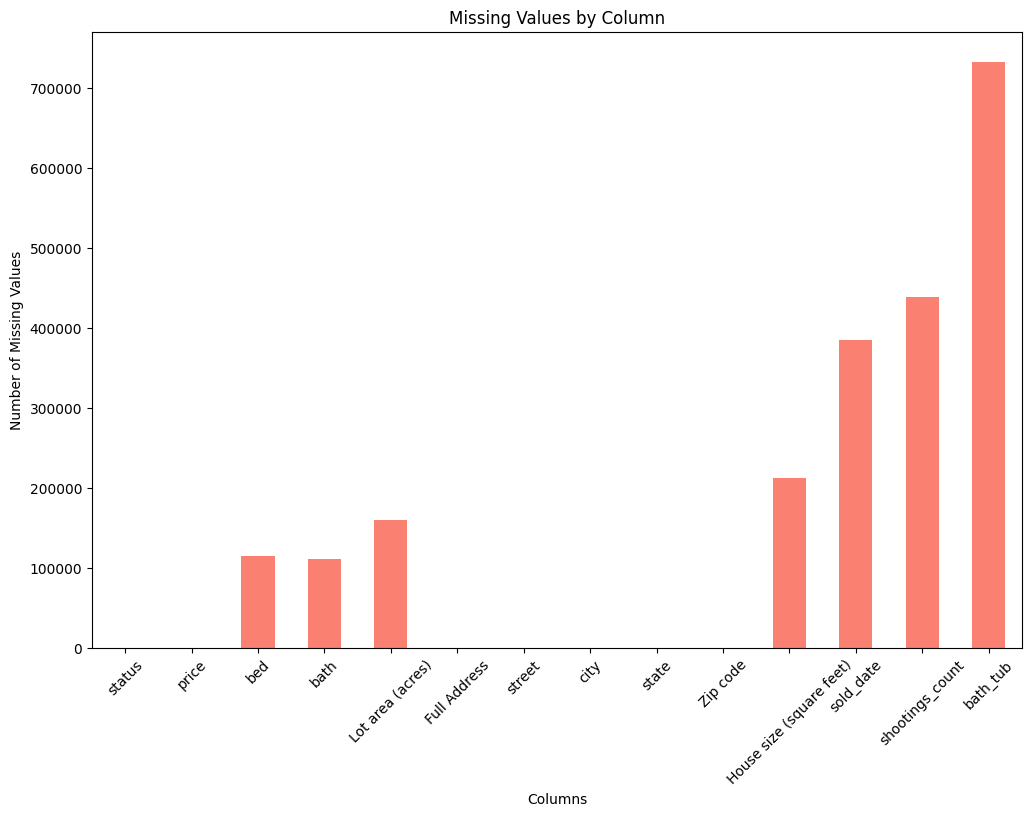

In [21]:
# Calculate missing values
missing_data = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(12, 8))
missing_data.plot(kind='bar', color='salmon')
plt.title('Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


## Limpieza de datos

In [20]:
def calculate_outliers(df: pd.DataFrame, field_name:str) -> float:
    mean = df[field_name].mean()
    std = df[field_name].std()

    print(f'{field_name} Promedio: {mean:,.2f} Desviacion standard {std:,.2f}')
    outliers = mean + 3 * std
    return outliers

### Renombrando columnas

Porqué?
- Estandarización
- Caracteres especiales
- Uso de la notacion .

In [21]:
print(f'Price max: {df.price.max():,}')

Price max: 875,000,000.0


In [22]:
column_dict = {
  "Lot area (acres)": "area_acres",
  "Full Address": 'full_address',
  "Zip code": "zip_code",
  "House size (square feet)": 'house_area_square_feet',
}

In [23]:
df = df.rename(columns=column_dict)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype               
---  ------                  --------------   -----               
 0   status                  733159 non-null  category            
 1   price                   733088 non-null  double[pyarrow]     
 2   bed                     617177 non-null  double[pyarrow]     
 3   bath                    621407 non-null  double[pyarrow]     
 4   area_acres              572378 non-null  double[pyarrow]     
 5   full_address            733159 non-null  string[pyarrow]     
 6   street                  733159 non-null  string[pyarrow]     
 7   city                    733159 non-null  category            
 8   state                   733159 non-null  string[pyarrow]     
 9   zip_code                732957 non-null  category            
 10  house_area_square_feet  520772 non-null  double[pyarrow]     
 11  sold_date    

### Eliminando los valores nulos

#### Usando dropna

In [1]:
df.isna().sum()

NameError: name 'df' is not defined

In [26]:
df = df.dropna(subset=['price', 'house_area_square_feet', 'area_acres', 'bed', 'bath'])

In [27]:
df.shape

print(f'Filas: {df.shape[0]:,} Porcentaje datos eliminados: {1-df.shape[0]/original_row_count:%}')

Filas: 383,547 Porcentaje datos eliminados: 47.685700%


#### Imputando values


### Camas

In [28]:
bed_mean = df['bed'].mean()
bed_std = df['bed'].std()

print(f'Promedio: {bed_mean:.2f} Desviacion standard {bed_std:.2f}')
outliers = bed_mean + 3 * bed_std

print(f'Outliers: +/- {outliers:.2f}')

Promedio: 3.78 Desviacion standard 2.17
Outliers: +/- 10.28


In [29]:
beds = df.loc[df['bed'] >= outliers]

print(beds.shape)

(4018, 14)


In [30]:
beds['bed'].describe()

count   4018.00
mean      15.54
std       10.30
min       11.00
25%       12.00
50%       12.00
75%       15.75
max       99.00
Name: bed, dtype: double[pyarrow]

In [31]:
df = df.drop(beds.index)

<Axes: >

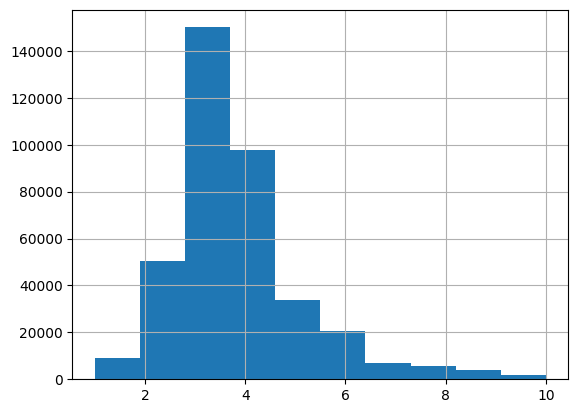

In [32]:
df['bed'].hist(bins=10)

### Banos

In [33]:
df['bath'].describe()

count   379529.00
mean         2.60
std          1.40
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         19.00
Name: bath, dtype: double[pyarrow]

In [34]:
bath_mean = df['bath'].mean()
bath_std = df['bath'].std()

print(f'Promedio: {bath_mean:.2f} Desviacion standard {bath_std:.2f}')
bath_outliers = bath_mean + 3 * bath_std

print(f'Outliers: +/- {bath_outliers:.2f}')

Promedio: 2.60 Desviacion standard 1.40
Outliers: +/- 6.79


In [35]:
baths = df.loc[df['bath'] >= outliers]

print(baths.shape)

(612, 14)


In [36]:
baths['bath'].describe()

count   612.00
mean     12.15
std       1.43
min      11.00
25%      11.00
50%      12.00
75%      13.00
max      19.00
Name: bath, dtype: double[pyarrow]

In [37]:
df = df.drop(baths.index)

<Axes: >

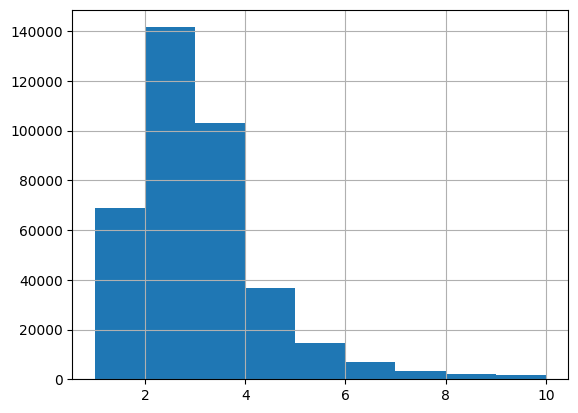

In [38]:
df['bath'].hist(bins=9)

### Precio

In [39]:
df['price'].describe()

count      378917.00
mean       682288.21
std       1137430.41
min           500.00
25%        270000.00
50%        425000.00
75%        700000.00
max     100000000.00
Name: price, dtype: double[pyarrow]

In [40]:
price_mean = df['price'].mean()
price_std = df['price'].std()

print(f'Promedio: {price_mean:,.2f} Desviacion standard {price_std:,.2f}')
price_outliers = price_mean + 3 * price_std

print(f'Outliers: +/- {price_outliers:,.2f}')

Promedio: 682,288.21 Desviacion standard 1,137,430.41
Outliers: +/- 4,094,579.44


In [41]:
extreme = df.loc[df['price'] >= price_outliers]

extreme.shape

(5175, 14)

In [42]:
df = df.drop(extreme.index)

df.shape

(373742, 14)

<Axes: >

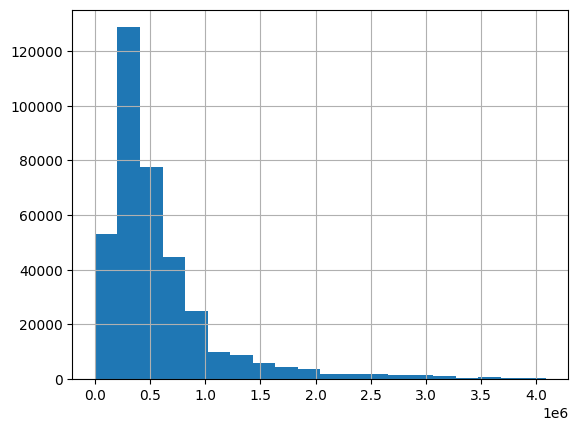

In [43]:
df['price'].hist(bins=20)

### Direcciones repetidas

In [44]:
df['full_address'].duplicated(keep='last').sum()

324104

In [45]:
df = df.drop_duplicates(keep='last', subset=['full_address'])

In [46]:
df.shape

(49638, 14)

### Nuevos campos

#### Area en metros cuadrados

In [47]:
df['house_size_m2'] = df['house_area_square_feet'] * 0.092903
df['lot_size_m2'] = df['area_acres'] * 4046.86

In [48]:
df['house_size_m2'].describe()

count   49638.00
mean      206.72
std       241.84
min        11.33
25%       120.77
50%       168.71
75%       242.66
max     37175.04
Name: house_size_m2, dtype: double[pyarrow]

In [49]:
o = calculate_outliers(df, 'house_size_m2')

print(f'Outliers +/- {o:,.2f}')

house_size_m2 Promedio: 206.72 Desviacion standard 241.84
Outliers +/- 932.24


In [50]:
df['lot_size_m2'].describe()

count       49638.00
mean        55885.46
std       3686450.57
min             0.00
25%           404.69
50%           930.78
75%          2832.80
max     404686000.00
Name: lot_size_m2, dtype: double[pyarrow]

#### Precio por metro cuadrado

In [51]:
df['price_x_m2'] = df['price'] / df['house_size_m2']

In [52]:
o = calculate_outliers(df, 'price_x_m2')

print(f'Outliers +/- {o:,.2f}')

price_x_m2 Promedio: 3,073.74 Desviacion standard 2,456.05
Outliers +/- 10,441.90


In [53]:
extreme_price_x_m2 = df.loc[df['price_x_m2'] >= o/3]

print(extreme_price_x_m2.shape)

(12862, 17)


In [54]:
df = df.drop(extreme_price_x_m2.index)

In [55]:
df.shape

(36776, 17)

<Axes: >

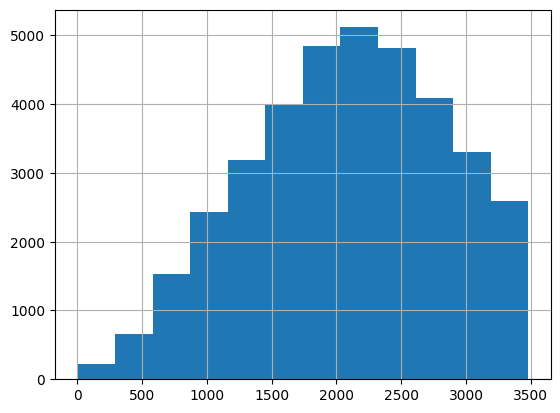

In [56]:
df['price_x_m2'].hist(bins=12)

In [57]:
df.isna().sum()

status                        0
price                         0
bed                           0
bath                          0
area_acres                    0
full_address                  0
street                        0
city                          0
state                         0
zip_code                      7
house_area_square_feet        0
sold_date                 13826
shootings_count           20733
bath_tub                  36776
house_size_m2                 0
lot_size_m2                   0
price_x_m2                    0
dtype: int64

## EDA

### Precio


<Axes: xlabel='house_size_m2', ylabel='price'>

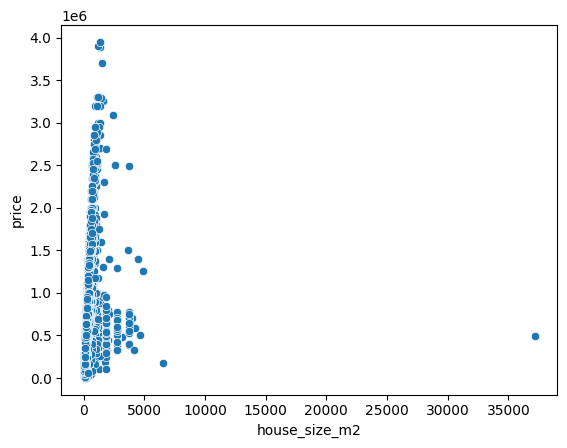

In [58]:
sns.scatterplot(data=df, x="house_size_m2", y="price")

### Limpieza de area


In [59]:
o = calculate_outliers(df, 'house_size_m2')

print(f'Outliers +/- {o:,.2f}')

house_size_m2 Promedio: 207.79 Desviacion standard 270.83
Outliers +/- 1,020.27


In [60]:
area_extreme = df.loc[df['house_size_m2'] >= o]

print(area_extreme.shape)

(210, 17)


In [61]:
df = df.drop(area_extreme.index)

<Axes: xlabel='house_size_m2', ylabel='price'>

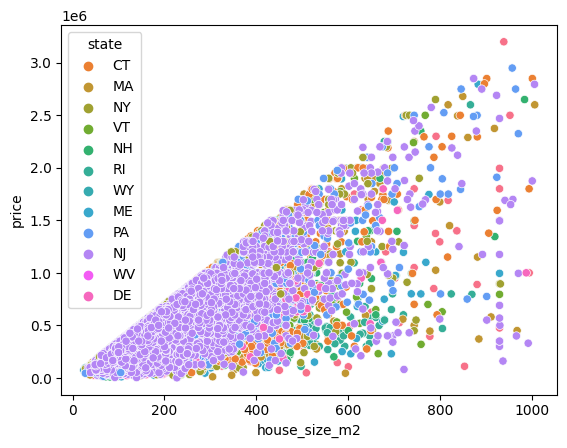

In [62]:
sns.scatterplot(data=df, x="house_size_m2", y="price", hue='state')

## Distribucion por estado

In [63]:
df['state'].value_counts()

state
NJ    9995
CT    7371
PA    5955
MA    2862
NY    2061
RI    1876
ME    1752
      1356
NH    1321
DE    1009
VT    1006
WY       1
WV       1
Name: count, dtype: int64[pyarrow]

Text(0.5, 1.0, 'Cantidad por Estado')

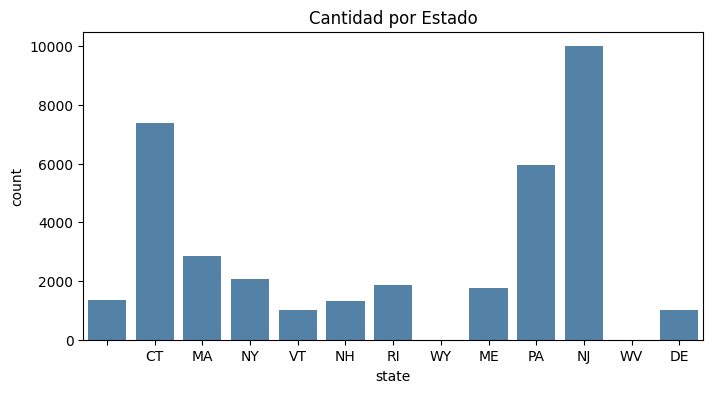

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='state', color='steelblue', ax=ax)
ax.set_title(f'Cantidad por Estado')

<Axes: xlabel='state', ylabel='price_x_m2'>

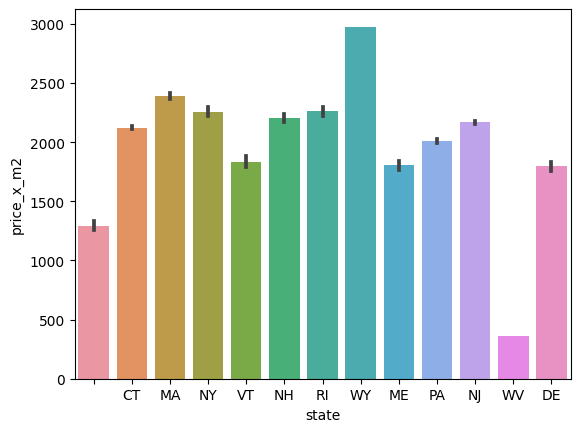

In [65]:

sns.barplot(data=df, x="state", y="price_x_m2")

In [66]:
ga = df.loc[df['state'] == '']

ga.shape

(1356, 17)

In [67]:
m = ga['price_x_m2'].mean()

print(f'Promedio {m}')

Promedio 1294.7951403608681


In [68]:
rango = 3e6


In [69]:
df.shape

(36566, 17)

## Analisis

In [70]:
base_price =  550_000
range_value = 0.10
min_price = base_price * (1 - range_value)
max_price = base_price * (1 + range_value)
print(min_price, max_price)

condition = (df['price'] <= max_price) & (df['price'] >= min_price) & (df['bed'] >= 3) & (df['bath'] >= 2)


condition = (df['price'] <= max_price) & (df['price'] >= min_price) & (df['bed'] >= 3) & (df['bed'] <= 5) & (df['bath'] >= 2)
fdf = df.loc[condition].copy()

495000.0 605000.0


In [71]:
fdf.shape

(3247, 17)

In [72]:
fdf['price'].describe()

count     3247.00
mean    547207.94
std      35459.95
min     495000.00
25%     519000.00
50%     549000.00
75%     579000.00
max     605000.00
Name: price, dtype: double[pyarrow]

### Cantidad por estado

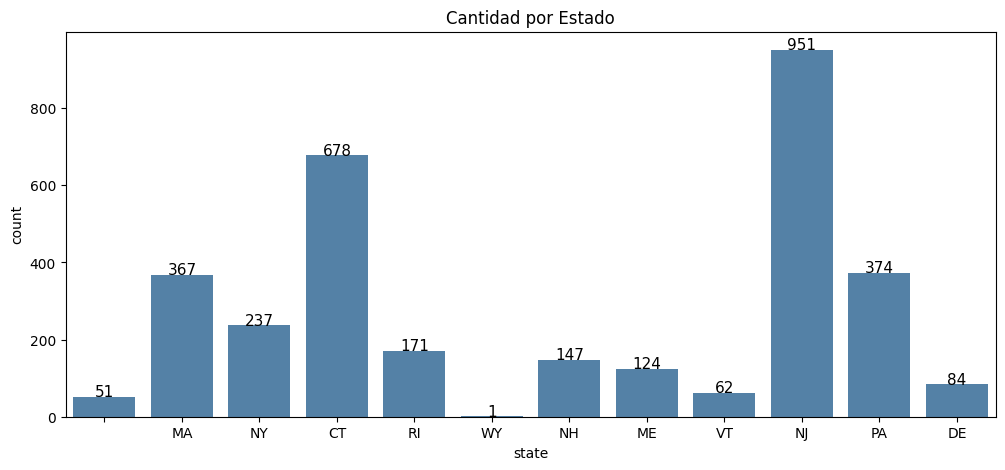

In [73]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=fdf, x='state', color='steelblue', ax=ax)
ax.set_title(f'Cantidad por Estado')

for rect in ax.patches:
  x_position =  int(rect.get_x() + rect.get_width() / 2)
  y_position = rect.get_height()+ 1
  display_value = f'{int(rect.get_height()):,}'
  ax.text(x_position ,y_position, display_value,horizontalalignment='center', fontsize = 11)

### Precio por metro cuadrado


<Axes: >

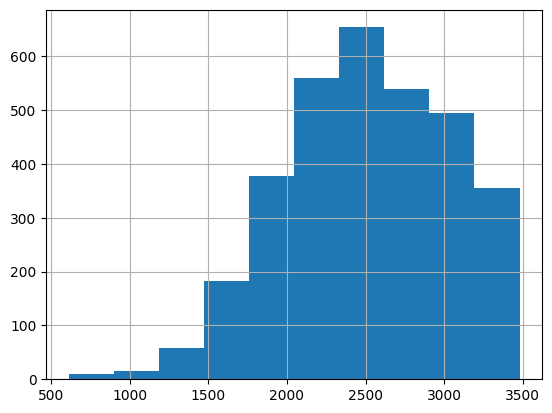

In [74]:
fdf['price_x_m2'].hist()

#### Box plots

<Axes: xlabel='price_x_m2', ylabel='state'>

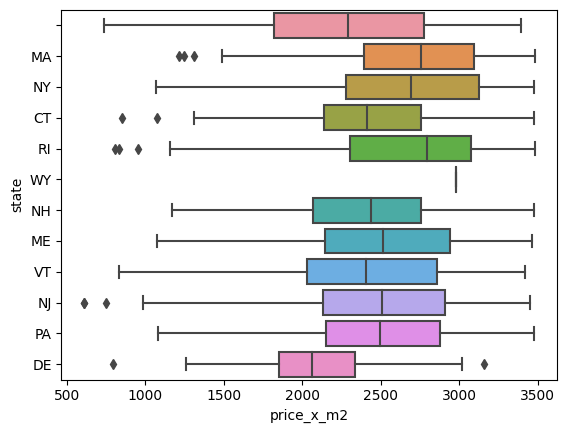

In [75]:
sns.boxplot(data=fdf, x="price_x_m2", y="state")

2123.7487656905305


<Axes: xlabel='price_x_m2'>

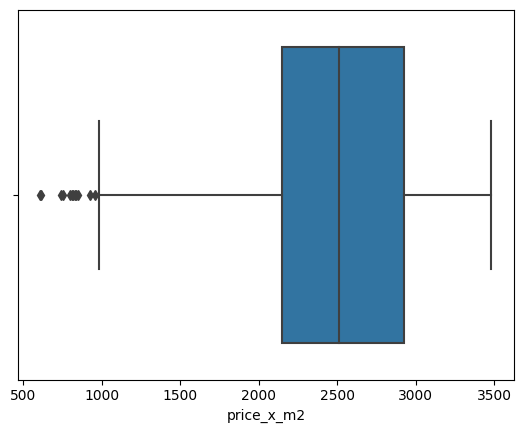

In [76]:
print(df['price_x_m2'].median())
sns.boxplot(data=fdf, x="price_x_m2")

<Axes: xlabel='house_size_m2', ylabel='price_x_m2'>

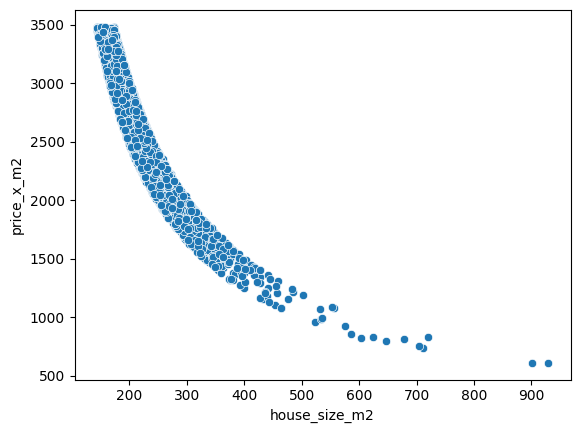

In [77]:
sns.scatterplot(data=fdf, x="house_size_m2", y="price_x_m2")

### Shootings

<Axes: >

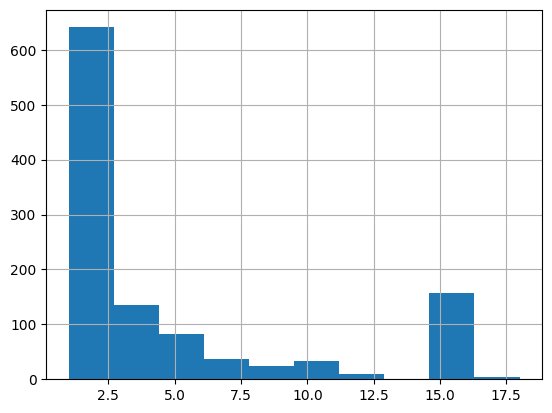

In [78]:
fdf['shootings_count'].hist()

<Axes: xlabel='shootings_count', ylabel='state'>

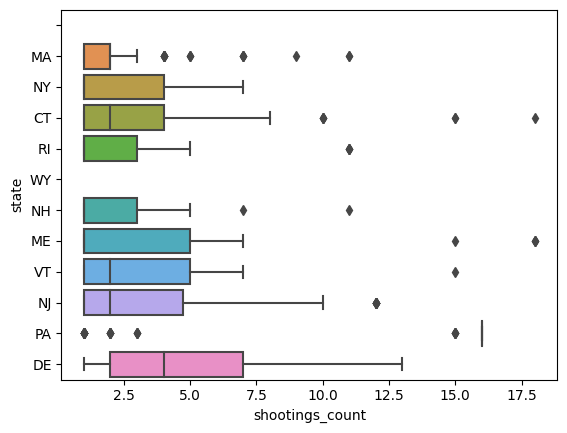

In [79]:
sns.boxplot(data=fdf, x="shootings_count", y="state")

## Ecuacion

Puntos = 3 * price_x_m2 + 3 * house_size_m2 + 2 * lot_size_m2 + bed + bath

psqm area lot beds bathrooms



In [80]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3247 entries, 638 to 733157
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype               
---  ------                  --------------  -----               
 0   status                  3247 non-null   category            
 1   price                   3247 non-null   double[pyarrow]     
 2   bed                     3247 non-null   double[pyarrow]     
 3   bath                    3247 non-null   double[pyarrow]     
 4   area_acres              3247 non-null   double[pyarrow]     
 5   full_address            3247 non-null   string[pyarrow]     
 6   street                  3247 non-null   string[pyarrow]     
 7   city                    3247 non-null   category            
 8   state                   3247 non-null   string[pyarrow]     
 9   zip_code                3247 non-null   category            
 10  house_area_square_feet  3247 non-null   double[pyarrow]     
 11  sold_date               2046 no

In [81]:
fdf['price_x_m2_v'] = (fdf['price_x_m2'] - fdf['price_x_m2'].mean())/ fdf['price_x_m2'].std()

In [82]:
fdf['price_x_m2_v'].describe()

count   3247.00
mean      -0.00
std        1.00
min       -3.61
25%       -0.69
50%        0.00
75%        0.79
max        1.85
Name: price_x_m2_v, dtype: double[pyarrow]

### Escalando los valores


\begin{align}
  x_{\text{scaled}} = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{align}


In [83]:
fdf['psqm'] =  (fdf['price_x_m2'] - fdf['price_x_m2'].min())/(fdf['price_x_m2'].max() - fdf['price_x_m2'].min())
fdf['area'] =  (fdf['house_size_m2'] - fdf['house_size_m2'].min())/(fdf['house_size_m2'].max() - fdf['house_size_m2'].min())
fdf['lot'] =  (fdf['lot_size_m2'] - fdf['lot_size_m2'].min())/(fdf['lot_size_m2'].max() - fdf['lot_size_m2'].min())
fdf['beds'] =  (fdf['bed'] - fdf['bed'].min())/(fdf['bed'].max() - fdf['bed'].min())
fdf['bathrooms'] =  (fdf['bath'] - fdf['bath'].min())/(fdf['bath'].max() - fdf['bath'].min())

### Explicacion de la ecuacion


\begin{align}
  value_{i} = 2PSQM + 3Area + 2lot + beds + bathrooms
\end{align}

In [84]:
fdf['value'] = 3 * fdf['psqm'] + 3 * fdf['area'] + 2 * fdf['lot'] + fdf[a'beds'] +  fdf['bathrooms']

In [85]:
fdf['value'] = 3 * fdf['psqm'] + 3 * fdf['area'] + 2 * fdf['lot'] + fdf['beds'] +  fdf['bathrooms']

In [86]:
fdf['value'].describe()

count   3247.00
mean       2.82
std        0.41
min        1.63
25%        2.56
50%        2.81
75%        3.08
max        4.81
Name: value, dtype: double[pyarrow]

<Axes: >

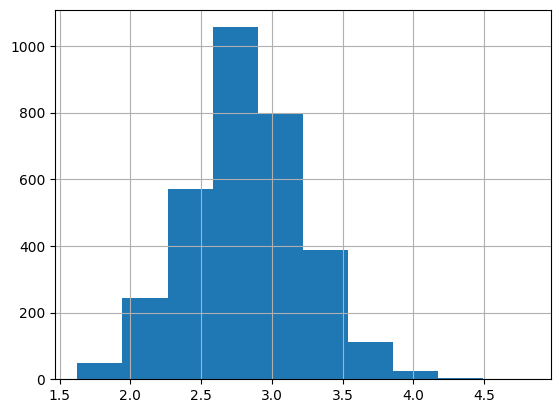

In [87]:
fdf['value'].hist()

<Axes: xlabel='value'>

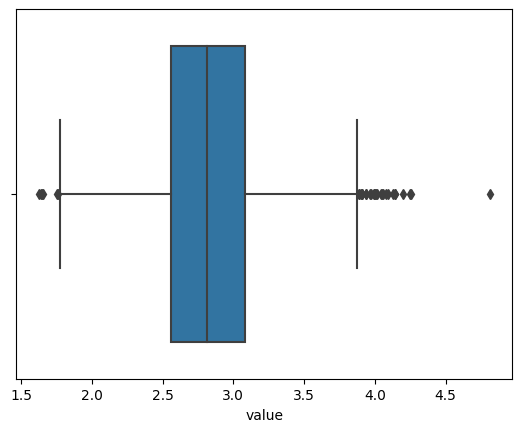

In [88]:
sns.boxplot(data=fdf, x="value")

<Axes: xlabel='value', ylabel='state'>

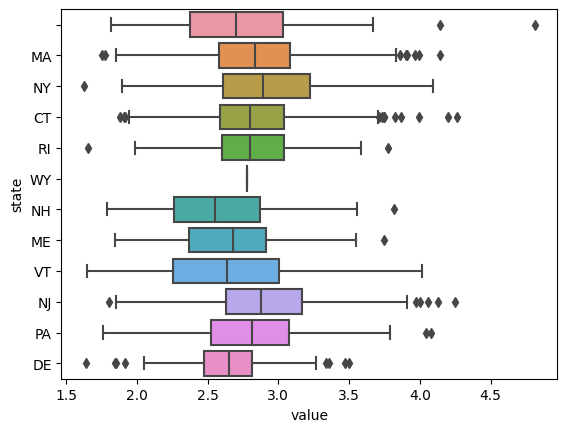

In [89]:
sns.boxplot(data=fdf, x="value", y="state")

In [90]:
fdf = fdf.sort_values(by=['value'], ascending=False)

fdf.head(10)

,status,price,bed,bath,area_acres,full_address,street,city,state,zip_code,house_area_square_feet,sold_date,shootings_count,bath_tub,house_size_m2,lot_size_m2,price_x_m2,price_x_m2_v,psqm,area,lot,beds,bathrooms,value
18822,for_sale,585000.00,4.00,4.00,100000.00,"NE Manantial Blvd NW Unit 86, San Juan, PR, 00926",NE Manantial Blvd NW Unit 86,San Juan,,926.00,3300.00,<NA>,<NA>,<NA>,306.58,404686000.00,1908.15,-1.14,0.45,0.21,1.00,0.50,0.33,4.81
463041,for_sale,505000.00,5.00,5.00,0.19,"54 Plattsville Ave, Norwalk, CT, 06851",54 Plattsville Ave,Norwalk,CT,6851.00,1700.00,2016-08-26,1.00,<NA>,157.94,768.90,3197.52,1.31,0.90,0.02,0.00,1.00,0.50,4.26
476800,for_sale,599000.00,5.00,3.00,0.05,"549 Avenue E, Bayonne, NJ, 07002",549 Avenue E,Bayonne,NJ,7002.00,1869.00,2016-08-24,<NA>,<NA>,173.64,202.34,3449.75,1.79,0.99,0.04,0.00,1.00,0.17,4.25
459171,for_sale,589000.00,5.00,3.00,2.42,"52 Merwin Brook Rd, Brookfield, CT, 06804",52 Merwin Brook Rd,Brookfield,CT,6804.00,1864.00,2003-06-30,<NA>,<NA>,173.17,9793.40,3401.26,1.70,0.97,0.04,0.00,1.00,0.17,4.20
226636,for_sale,544900.00,5.00,3.00,0.57,"83 Holden St, Shrewsbury, MA, 01545",83 Holden St,Shrewsbury,MA,1545.00,1728.00,2005-04-11,<NA>,<NA>,160.54,2306.71,3394.25,1.68,0.97,0.02,0.00,1.00,0.17,4.14
8971,for_sale,595000.00,5.00,4.00,0.67,"4 Five Cors, Vieques, PR, 00765",4 Five Cors,Vieques,,765.00,2049.00,<NA>,<NA>,<NA>,190.36,2711.40,3125.69,1.17,0.88,0.06,0.00,1.00,0.33,4.14
573720,for_sale,599900.00,5.00,3.00,0.14,"31 Luddington Ave, Clifton, NJ, 07011",31 Luddington Ave,Clifton,NJ,7011.00,1954.00,2020-12-16,<NA>,<NA>,181.53,566.56,3304.64,1.51,0.94,0.05,0.00,1.00,0.17,4.13
454909,for_sale,563000.00,5.00,4.00,0.45,"28 Crater Lake Dr, Coram, NY, 11727",28 Crater Lake Dr,Coram,NY,11727.00,1947.00,<NA>,<NA>,<NA>,180.88,1821.09,3112.52,1.15,0.87,0.05,0.00,1.00,0.33,4.09
660732,for_sale,565000.00,5.00,3.00,0.09,"7803 Linden Rd, Wyndmoor, PA, 19038",7803 Linden Rd,Wyndmoor,PA,19038.00,1848.00,2007-04-17,<NA>,<NA>,171.68,364.22,3290.92,1.49,0.93,0.04,0.00,1.00,0.17,4.08
676557,for_sale,549900.00,5.00,3.00,0.12,"245 W Poplar Ave, Wildwood, NJ, 08260",245 W Poplar Ave,Wildwood,NJ,8260.00,1798.00,2005-05-18,<NA>,<NA>,167.04,485.62,3292.03,1.49,0.93,0.03,0.00,1.00,0.17,4.06


In [91]:
fdf['full_address'].duplicated(keep='last').sum()

0

In [92]:
fdf.shape

(3247, 24)

In [97]:
cols = ['price', 'value', 'price_x_m2', 'house_size_m2', 'lot_size_m2', 'bed', 'bath']
df2 = fdf[cols]

df2.head(10)

,price,value,price_x_m2,house_size_m2,lot_size_m2,bed,bath
18822,585000.00,4.81,1908.15,306.58,404686000.00,4.00,4.00
463041,505000.00,4.26,3197.52,157.94,768.90,5.00,5.00
476800,599000.00,4.25,3449.75,173.64,202.34,5.00,3.00
459171,589000.00,4.20,3401.26,173.17,9793.40,5.00,3.00
226636,544900.00,4.14,3394.25,160.54,2306.71,5.00,3.00
8971,595000.00,4.14,3125.69,190.36,2711.40,5.00,4.00
573720,599900.00,4.13,3304.64,181.53,566.56,5.00,3.00
454909,563000.00,4.09,3112.52,180.88,1821.09,5.00,4.00
660732,565000.00,4.08,3290.92,171.68,364.22,5.00,3.00
676557,549900.00,4.06,3292.03,167.04,485.62,5.00,3.00
